# To create a model which predicts a probability of each type of toxicity for each comment.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##EXTRACTING DATASET FROM KAGGLE


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.7/dist-packages (1.5.10)


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amandeeprana25","key":"27121a9c08c03142ff52faca5aae2083"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! cd /content/drive/MyDrive/AI-Project-Toxic-classification/kaggle
! kaggle competitions download -c jigsaw-toxic-comment-classification-challenge
#kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

401 - Unauthorized


In [ ]:
! mkdir train
! unzip /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv -d train

unzip:  cannot find or open /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw, /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw.zip or /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw.ZIP.


In [ ]:
! mkdir test
! unzip /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/test/test.csv -d test

unzip:  cannot find or open /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw, /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw.zip or /content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw.ZIP.


#### **ADDED DATASETS; RUN CELLS FROM HERE **

## Jigsaw Dataset - Wikipedia TalkPages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv')

In [ ]:
df_train.head(10)

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0
5  00025465d4725e87  ...             0
6  0002bcb3da6cb337  ...             0
7  00031b1e95af7921  ...             0
8  00037261f536c51d  ...             0
9  00040093b2687caa  ...             0

[10 rows x 8 columns]

In [ ]:
df_train.describe()

toxic   severe_toxic  ...         insult  identity_hate
count  159571.000000  159571.000000  ...  159571.000000  159571.000000
mean        0.095844       0.009996  ...       0.049364       0.008805
std         0.294379       0.099477  ...       0.216627       0.093420
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.000000       0.000000  ...       0.000000       0.000000
50%         0.000000       0.000000  ...       0.000000       0.000000
75%         0.000000       0.000000  ...       0.000000       0.000000
max         1.000000       1.000000  ...       1.000000       1.000000

[8 rows x 6 columns]

In [ ]:
print("Total number of columns: ",df_train.shape[1])
print("Total number of rows: ",df_train.shape[0])

Total number of columns:  8
Total number of rows:  159571


#Exploratory Data Analysis


In [ ]:
#the dataset
df_train.head(10)

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0
5  00025465d4725e87  ...             0
6  0002bcb3da6cb337  ...             0
7  00031b1e95af7921  ...             0
8  00037261f536c51d  ...             0
9  00040093b2687caa  ...             0

[10 rows x 8 columns]

In [ ]:
#total columns in the dataset
print(df_train.columns.tolist())


['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
#shape of the data
df_train.shape

(159571, 8)

In [ ]:
#the dataset
df_train.describe()

toxic   severe_toxic  ...         insult  identity_hate
count  159571.000000  159571.000000  ...  159571.000000  159571.000000
mean        0.095844       0.009996  ...       0.049364       0.008805
std         0.294379       0.099477  ...       0.216627       0.093420
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.000000       0.000000  ...       0.000000       0.000000
50%         0.000000       0.000000  ...       0.000000       0.000000
75%         0.000000       0.000000  ...       0.000000       0.000000
max         1.000000       1.000000  ...       1.000000       1.000000

[8 rows x 6 columns]

**Observation**: The count values clearly indicate that there are no null values present

In [ ]:
#confirming the number of missing values in the data set
df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
#total columns in the dataset
colms=df_train.columns.tolist()
colms=colms[2:]
print(colms)

Dataset Distribution by class

In [ ]:
print("total toxic comments = ", sum(col_count), " and total non-toxic comments = ", (df_train.shape[0]-sum(col_count)))

total toxic comments =  35098  and total non-toxic comments =  124473


In [ ]:

col_count=[]
for col in colms:
  count=0
  for items in df_train[col]:
    if items==1:
      count+=1
  col_count.append(count)

zip_col= list(zip(colms, col_count))
print(zip_col)



[('toxic', 15294), ('severe_toxic', 1595), ('obscene', 8449), ('threat', 478), ('insult', 7877), ('identity_hate', 1405)]


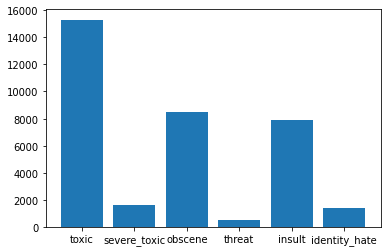

In [ ]:
import random
fig = plt.figure()
ax=fig.add_subplot(111)
ax.bar(colms, col_count)
plt.show()


Data Distribution by number of labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


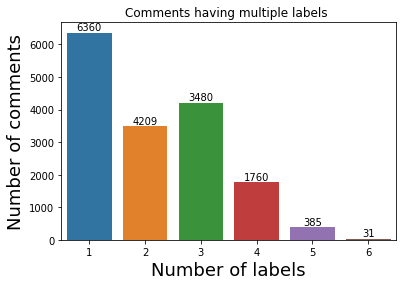

In [ ]:
rowSums = df_train.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()



---



In [ ]:
import matplotlib.pyplot as plt


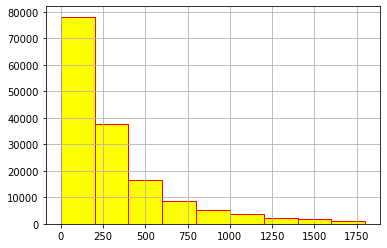

In [ ]:
#number of characters present in each sentence
df_train['comment_text'].str.len().hist(ec="red", color="yellow", bins = np.arange(0, 2000, 200))


**Observation**: The histogram shows that comments range from 1 to 1750 characters and generally, it is between 1 to 500 characters.


---





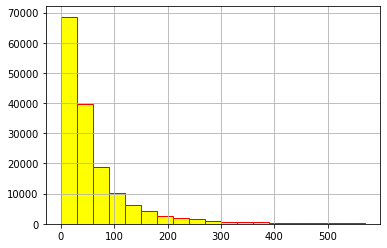

In [ ]:
#plot for the number of words appearing in each comment
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist(ec="red", color="yellow", bins = np.arange(0, 600, 30))

plot_word_number_histogram(df_train['comment_text'])


**Observation**: It is clear that the number of words in a comment ranges from 1 to 400 and mostly falls between 1 to 100 words.


---




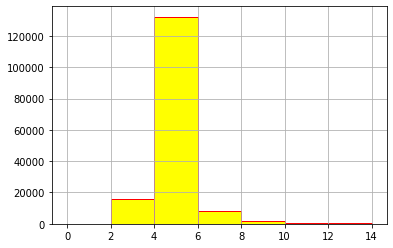

In [ ]:
#average word length in each sentence
import numpy as np
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist(ec="red", color="yellow", bins = [0,2,4,6,8,10,12,14])

plot_word_length_histogram(df_train['comment_text'])

**Observation**: The average word length ranges between 2 to 10 with 5 being the most common word length. Does it mean that people are using really short words in comments? One reason for this can be, stopwords. ("the”/”a”/”an” )

Due to the presence of these stop words, the average word length might be incorrectly left-skewed. 

---








In [ ]:
#Analyzing the amount and the types of stopwords using the corpus of the nltk library. 
#Nltk contains stopwords from many languages. Considering only English here.  
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


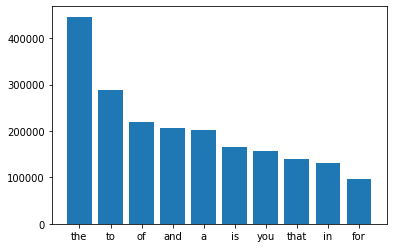

In [ ]:
plot_top_stopwords_barchart(df_train['comment_text'])

**Observation**: It can be easily seen that stopwords such as “the”, ”to”, “of”, ”and” and “a” dominate in the comments.




---



Now important processes to do in order to better understand the data are:

*   *Lowercasing*:Like converting "The" to "the"
*   *Remove stopword and punctuation*: Such as “the”, ”to”, “of”, ”and” and “a” 
*   *Tokenize*: Convert sentences into a list of tokens
*   *Lemmatize/Stemming*: Reduce the inflectional forms of words to its stem, like "who" and "whose"


---










In [ ]:
df_train.head()

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]

In [ ]:
#only removes stop words and lowers, particularly for wordcloud
df_train['processed_text'] = df_train['comment_text'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.split() if i not in stop]).lower())

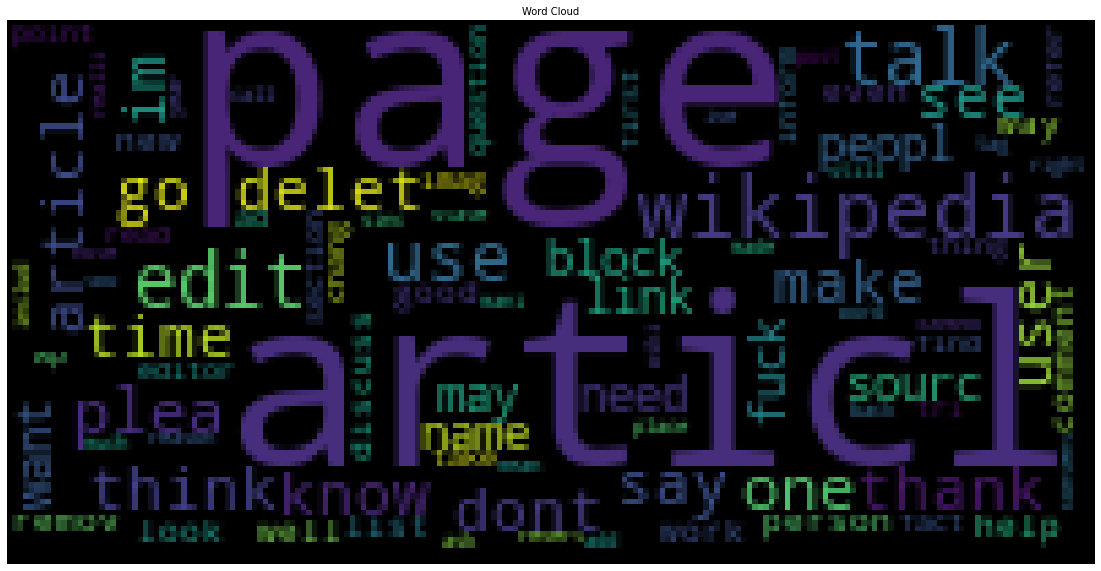

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20,10))
# clean
text = df_train.processed_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=200,
                          height=100
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Word Cloud",fontsize=10)
plt.imshow(cloud_toxic)

In [ ]:
#Tokenizing and Lemmatizing using NLTK
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_comments(df):
    corpus=[]
    stem=  PorterStemmer()
    lem=WordNetLemmatizer()
    for df_train in df['comment_text']:
        words=[w for w in word_tokenize(df_train) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_comments(df_train)
print(corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Observation**: The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.


---






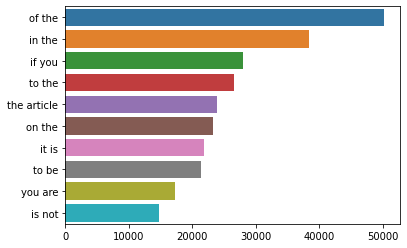

In [ ]:
#Most frequent n-grams to understand the context in which the word was used
#Using the ngrams function from nltk.util. 

#bigrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

plot_top_ngrams_barchart(df_train['comment_text'],2)


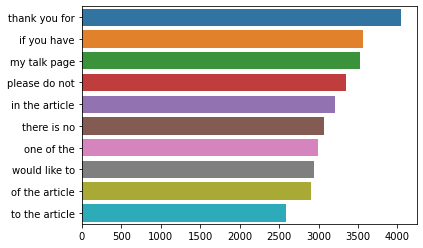

In [ ]:
#trigrams
plot_top_ngrams_barchart(df_train['comment_text'],3)


In [ ]:
stemmer = PorterStemmer()
df_train['processed_text'] = df_train['comment_text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stop]).lower())

** *italicized text*Observation**: The trigram analysis is more insightful. Phrases like "thank you for", "if you have", "my talk page", "please do not", and "would like to" dominate most comments!



---



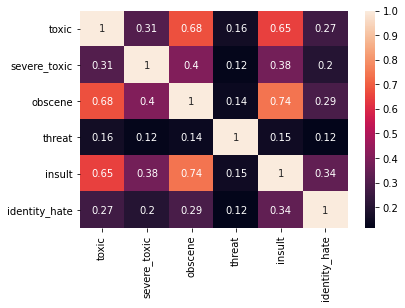

In [ ]:
#visualizing correlation

target_data = df_train.drop(['id', 'comment_text'], axis=1)
corrMatrix = target_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Observation**: Correlation helps us finding relationship/dependencies. Some labels are highely correlated. Correlation coefficient for insult-obscene is 0.74.


1.   "Toxic" comments are clearly correlated with both "obscene" and "insult" comments.
2.   Interestingly, "toxic" and "severe_toxic" are only weakly correlated.

3.   "Obscene" comments and "insult" comments are also highly correlated, which makes perfect sense.






---



# Data Prep for ML models: RFC, Logistic Regression, SVM, Decision Tree

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/test/test.csv')

In [ ]:
#for EDA LR
df_train = train

In [ ]:
#total columns in the dataset
colms=df_train.columns.tolist()
colms=colms[1:]
print(colms)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
col_count=[]
for col in colms:
  count=0
  for items in df_train[col]:
    if items==1:
      count+=1
  col_count.append(count)

zip_col= list(zip(colms, col_count))
print(zip_col)



[('toxic', 15160), ('severe_toxic', 1860), ('obscene', 8380), ('threat', 320), ('insult', 8240), ('identity_hate', 1300)]


In [ ]:
df_train["comment_text"].fillna("unknown", inplace=True)
df_train["comment_text"].fillna("unknown", inplace=True)

In [ ]:
df_train.head()
#df_train=df_train.sample(n=100000)

comment_text  ...  identity_hate
0  benidorm speak valencian atalan edited contemp...  ...              0
1  benidorm utter valencian catalan redact insult...  ...              0
2  benidorm speak valencian atalan edited insulti...  ...              0
3  benidorm speak valencian catalan editout insul...  ...              0
4  benidorm verbalize valencian atalan edited ins...  ...              0

[5 rows x 7 columns]

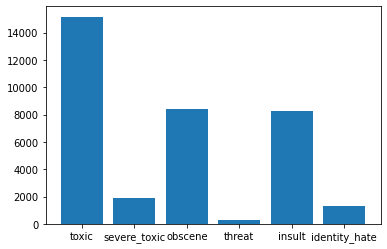

In [ ]:
col_count=[]
for col in colms:
  count=0
  for items in df_train[col]:
    if items==1:
      count+=1
  col_count.append(count)

fig = plt.figure()
ax=fig.add_subplot(111)
ax.bar(colms, col_count)
plt.show()

In [ ]:
zip_col= list(zip(colms, col_count))
print(zip_col)

#[('toxic', 15294), ('severe_toxic', 1595), ('obscene', 8449), ('threat', 478), ('insult', 7877), ('identity_hate', 1405)]

[('toxic', 4757), ('severe_toxic', 498), ('obscene', 2628), ('threat', 160), ('insult', 2422), ('identity_hate', 456)]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


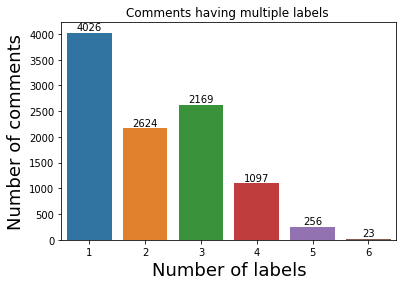

In [ ]:
rowSums = df_train.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [ ]:
#Analyzing the amount and the types of stopwords using the corpus of the nltk library. 
#Nltk contains stopwords from many languages. Considering only English here.  
import nltk
import re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop=set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = PorterStemmer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stop]).lower())

In [ ]:
#Removing stopwords
###################################################
def remove_stopwords(df):
    corp=[]
    for df_t in df['comment_text']:
      if (df_t not in stop):
        corp.append(df_t)
    return corp

wostopwords=remove_stopwords(df_train)
df_train['comment_text']=wostopwords
df_train.head()

In [ ]:
#Lowercasing all comments, removing unnecessary spaces
###############################################
df_train['comment_text']=df_train['comment_text'].str.lower().str.strip()
df_train = df_train.replace('\n',' ', regex=True)
df_train = df_train.replace('\t',' ', regex=True)
df_train = df_train.replace('\r',' ', regex=True)
df_train['comment_text']= df_train['comment_text'].replace("’", "", regex=True)
df_train['comment_text'] = df_train['comment_text'].replace("'", "", regex=True)
df_train['comment_text'] = df_train['comment_text'].replace("-", " ", regex=True)
df_train.head()

comment_text  ...  identity_hate
0  benidorm speak valencian atalan edit contemptu...  ...              0
1  benidorm utter valencian catalan redact insult...  ...              0
2  benidorm speak valencian atalan edit insult wo...  ...              0
3  benidorm speak valencian catalan editout insul...  ...              0
4  benidorm verbal valencian atalan edit insult w...  ...              0

[5 rows x 7 columns]

In [ ]:
'''text: list of text documents'''
def tokenize(text):
    tokenized =  sent_tokenize(text)
    return tokenized

for comm in df_train:
  comm=tokenize(comm)
#df_train =  tokenize(df_train)

In [ ]:
import pickle
import os

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train["comment_text"], df_train[colms].values, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35000,) (15000,) (35000, 6) (15000, 6)


## Vectorization Functions

COUNT_VEC <br>
TFIDF<br>
WORD2VEC<br>
GLOVE(Done Above in DL models)<br>

In [ ]:
#Count Vectorization

In [ ]:
def vectorize_countvec(X_train, X_test):
  count_vec= CountVectorizer()
  X_train=count_vec.fit_transform(X_train)
  X_test=count_vec.fit_transform(X_test)

vectorize_countvec(X_train, X_test)

In [ ]:
#TFIDF

In [ ]:
vect_word = TfidfVectorizer(max_features=15000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)

In [ ]:
X_train = vect_word.fit_transform(X_train)
X_test = vect_word.transform(X_test)


In [ ]:
X_train.shape

(35000, 15000)

In [ ]:
X_test.shape


(15000, 15000)

In [ ]:
X_train = sparse.hstack(X_train)
X_test = sparse.hstack(X_test)

In [ ]:
#Word to Vector

In [ ]:
from gensim.models import word2vec
def vectorize_word2vec(X_train, X_test):
  count_vec= CountVectorizer()
  X_train=count_vec.fit_transform(X_train)
  X_test=count_vec.fit_transform(X_test)
  
  train_tokenized_sentences = [sentence.split() for sentence in X_train]
  test_tokenized_sentences = [sentence.split() for sentence in X_test]
  X_train = word2vec.Word2Vec(train_tokenized_sentences, min_count=2)
  X_test = word2vec.Word2Vec(test_tokenized_sentences, min_count=2)
  
vectorize_word2vec(X_train, X_test)

#### Data used for following algos is minimized, due to computational inefficiency. (sliced to 50k values of 159k)
#### To Do: Increase data size to improve results

# Logistic Regression

In [ ]:
vect_word = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
vect_char = TfidfVectorizer(max_features=40000, lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=(3,6),dtype=np.float32)

In [ ]:
# Word ngram vector
tr_vect = vect_word.fit_transform(df_train['comment_text'])
ts_vect = vect_word.transform(df_test['comment_text'])

# Character n gram vector
#tr_vect_char = vect_char.fit_transform(df_train['comment_text'])
#ts_vect_char = vect_char.transform(df_test['comment_text'])

In [ ]:
#X = sparse.hstack([tr_vect, tr_vect_char])
#x_test = sparse.hstack([ts_vect, ts_vect_char])
X = sparse.hstack(tr_vect)
x_test = sparse.hstack(ts_vect)

In [ ]:
y = df_train[classes]
del tr_vect, ts_vect, tr_vect_char, ts_vect_char

In [ ]:
prd = np.zeros((x_test.shape[0],y.shape[1]))
cv_score =[]
for i,col in enumerate(colms):
    lr = LogisticRegression(C=2,random_state = i,class_weight = 'balanced')
    print('Building {} model for column:{''}'.format(i,col)) 
    lr.fit(X,y[col])
    #cv_score.append(lr.score)
    prd[:,i] = lr.predict_proba(x_test)[:,1]

Building 0 model for column:toxic


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 1 model for column:severe_toxic


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 2 model for column:obscene


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 3 model for column:threat
Building 4 model for column:insult


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 5 model for column:identity_hate


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
for col in classes:
  print("Column:",col)
  pred =  lr.predict(x_test)
  print('\nConfusion matrix\n',confusion_matrix(y[col],pred))
  print(classification_report(y[col],pred))

In [ ]:
for col in classes:
  print("Column:",col)
  pred =  lr.predict(x_test)
  print('\nConfusion matrix\n',confusion_matrix(y[col],pred))
  print(classification_report(y[col],pred))

Column: toxic

Confusion matrix
 [[143846    431]
 [ 12567   2727]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    144277
           1       0.86      0.18      0.30     15294

    accuracy                           0.92    159571
   macro avg       0.89      0.59      0.63    159571
weighted avg       0.91      0.92      0.89    159571

Column: severe_toxic

Confusion matrix
 [[155478   2498]
 [   935    660]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    157976
           1       0.21      0.41      0.28      1595

    accuracy                           0.98    159571
   macro avg       0.60      0.70      0.63    159571
weighted avg       0.99      0.98      0.98    159571

Column: obscene

Confusion matrix
 [[149999   1123]
 [  6414   2035]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    151122
           1       0.64 

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()
model = RFC.fit(X_train, y_train)
with open('/content/drive/MyDrive/AI-Project-Toxic-classification/RandomForestClassifier.pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, model.predict(X_test)))
print(confusion_matrix(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      0.62      0.72      1450
           1       0.44      0.08      0.13       139
           2       0.85      0.69      0.76       765
           3       1.00      0.02      0.04        51
           4       0.73      0.50      0.59       725
           5       0.37      0.06      0.10       126

   micro avg       0.82      0.56      0.66      3256
   macro avg       0.71      0.33      0.39      3256
weighted avg       0.79      0.56      0.64      3256
 samples avg       0.06      0.05      0.05      3256

[[14918     1     0     1     0]
 [   48     0     0     0     0]
 [    2     0     0     0     0]
 [   26     0     0     0     0]
 [    4     0     0     0     0]]


#SVM

##Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv')

In [ ]:
df_train.head()

comment_text  ...  identity_hate
0  benidorm speak valencian atalan edit contemptu...  ...              0
1  benidorm utter valencian catalan redact insult...  ...              0
2  benidorm speak valencian atalan edit insult wo...  ...              0
3  benidorm speak valencian catalan editout insul...  ...              0
4  benidorm verbal valencian atalan edit insult w...  ...              0

[5 rows x 7 columns]

In [ ]:
df_train.shape

(159571, 8)

In [ ]:
df_train["comment_text"].fillna("unknown", inplace=True)

In [ ]:
df_train=df_train.sample(n=100000)

In [ ]:
df_train.shape

(100000, 8)

In [ ]:
#total columns in the dataset
colms=df_train.columns.tolist()
colms=colms[2:]
print(colms)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
#Analyzing the amount and the types of stopwords using the corpus of the nltk library. 
#Nltk contains stopwords from many languages. Considering only English here.  
import nltk
import re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop=set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = PorterStemmer()
df_train['processed_text'] = df_train['comment_text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stop]).lower())

In [ ]:
#Lowercasing all comments, removing unnecessary spaces
###############################################
def prep_comments(df):
  df['comment_text']=df['comment_text'].str.lower().str.strip()
  df = df.replace('\n',' ', regex=True)
  df = df.replace('\t',' ', regex=True)
  df = df.replace('\r',' ', regex=True)
  df['comment_text']= df['comment_text'].replace("’", "", regex=True)
  df['comment_text'] = df['comment_text'].replace("'", "", regex=True)
  df['comment_text'] = df['comment_text'].replace("-", " ", regex=True)
  return df
df_train=prep_comments(df_train)
df_train.head()

id  ...                                     processed_text
23614   3e5d63365ce024d1  ...  the text the ip ad articl mention mccarthi the...
130516  ba3dd5b507949af1  ...  no tri give kind magic preced hypothesi never ...
140410  ef57d18c275dbba7  ...  kind complet backward given one place i would ...
42411   712cb3f7df2f85ab  ...  rockpocket get mail sent seem vandal anon ip u...
29462   4e25652fbda5b998  ...  who care indent sign wikilawy rule high import...

[5 rows x 9 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train["comment_text"], df_train[colms], test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(111706,) (47874,) (111706, 6) (47874, 6)


In [ ]:
print(y_train)

        toxic  severe_toxic  obscene  threat  insult  identity_hate
65774       0             0        0       0       0              0
59135       0             0        0       0       0              0
118084      1             0        0       0       1              0
44898       1             0        0       0       0              0
100638      0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
156791      0             0        0       0       0              0
25655       0             0        0       0       0              0
111345      0             0        0       0       0              0
32986       0             0        0       0       0              0
150650      0             0        0       0       0              0

[70000 rows x 6 columns]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def vectorize_tfidf(X_train, X_test):
  vect_word = TfidfVectorizer(max_features=15000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
  X_train = vect_word.fit_transform(X_train)
  X_test = vect_word.transform(X_test)
  return X_train, X_test

X_train, X_test = vectorize_tfidf(X_train, X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

##Run SVM with default hyperparameters 
Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [ ]:
svm_rbf = OneVsRestClassifier(SVC(decision_function_shape='ovo'))
svm_rbf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovo', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [ ]:
y_pred_svm_rbf = svm_rbf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred_svm_rbf))

Accuracy:  0.9176333333333333


##Run SVM with rbf kernel and C=100.0

In [ ]:
svm_model_linear = OneVsRestClassifier(SVC(C=100,decision_function_shape='ovo'))
svm_model_linear.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=100, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovo', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [ ]:
y_pred = svm_model_linear.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.9167666666666666


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73      2921
           1       0.52      0.20      0.29       292
           2       0.89      0.67      0.76      1586
           3       0.60      0.07      0.13        83
           4       0.78      0.54      0.64      1492
           5       0.58      0.23      0.33       270

   micro avg       0.85      0.57      0.68      6644
   macro avg       0.71      0.39      0.48      6644
weighted avg       0.83      0.57      0.68      6644
 samples avg       0.06      0.05      0.05      6644



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  [26852   227]

True Negatives(TN) =  [233  59]

False Positives(FP) =  [1102 1819]

False Negatives(FN) =  [29653    55]


## Run SVM with linear kernel and C=1.0

In [ ]:
svm_model_linear = OneVsRestClassifier(SVC(kernel='linear', C=1.0,decision_function_shape='ovo'))
svm_model_linear.fit(X_train, y_train)

In [ ]:
y_pred = svm_model_linear.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.9167666666666666


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#print(history.history.keys())


plt.figure(figsize=(16,3))
plt.suptitle('Accuracy and Loss Comparison')

gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Augmented Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')


plt.subplot2grid((1,2),(0,1))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Augmented Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')


# Easy Data Augmentation

n= al where, <br>
n= no of words to be replaced <br>
a=constant, hyperparameter <br>
l=length of sentence <br>

 To run algos on Augmented Data, replace df_train with "Augmented_Sentences"

In [ ]:
EDA_df = df_train.sample(frac=0.05)
print(len(EDA_df))
EDA_df.head()

7979


id  ... identity_hate
98609   0f754d80db105111  ...             0
46886   7d4f05ca7a4ba321  ...             0
7830    14d9522b731d0088  ...             0
138364  e446e3168acb062d  ...             0
130631  bacd8d289c6a4fec  ...             0

[5 rows x 8 columns]

In [ ]:
com_text=EDA_df['comment_text'].tolist()
print(len(com_text))

7979


In [ ]:
import random
from random import shuffle
from nltk.corpus import wordnet

In [ ]:
def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words if word not in stop]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			#print("replaced", random_word, "with", synonym)
			num_replaced += 1
		if num_replaced >= n: #only replace up to n words
			break

	#this is stupid but we need it, trust me
	sentence = ' '.join(new_words)
	new_words = sentence.split(' ')

	return new_words

def get_synonyms(word):
	synonyms = set()
	for syn in wordnet.synsets(word): 
		for l in syn.lemmas(): 
			synonym = l.name()#.replace("_", " ").replace("-", " ").lower()
			synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
			synonyms.add(synonym) 
	if word in synonyms:
		synonyms.remove(word)
	return list(synonyms)

In [ ]:
def random_swap(words, n):
  if len(words)<2:
    return words
  new_words = words.copy()
  for _ in range(int(n)):
    new_words = swap_word(new_words)
  return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0
	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words
	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
	return new_words


In [ ]:
def random_insertion(words, n):
  if len(words)<2:
    return words
  new_words = words.copy()
  for _ in range(int(n)):
    add_word(new_words)
  return new_words

def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		random_word = new_words[random.randint(0, len(new_words)-1)]
		synonyms = get_synonyms(random_word)
		counter += 1
		if counter >= 10:
			return
	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)

In [ ]:
def random_deletion(words, p):

	#obviously, if there's only one word, don't delete it
	if len(words) <= 2:
		return words

	#randomly delete words with probability p
	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	#if you end up deleting all words, just return a random word
	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

In [ ]:
def EDA_func(sentence):
  words = sentence.split(' ')
  words = [word for word in words if word is not '']
  num_words=len(words)
  num_aug= 5
  augmented_sentences = []
  a= 0.1
  p=0.1
  n= max(1, a* num_words)
  for _ in range(num_aug):
    aug_words = synonym_replacement(words, n)
    augmented_sentences.append(' '.join(aug_words))

  for _ in range(num_aug):
    aug_words = random_swap(words, n)
    augmented_sentences.append(' '.join(aug_words))

  for _ in range(num_aug):
    aug_words = random_insertion(words, n)
    augmented_sentences.append(' '.join(aug_words))

  for _ in range(num_aug):
    aug_words = random_deletion(words, p)
    augmented_sentences.append(' '.join(aug_words))

  return augmented_sentences

"""

	words = sentence.split(' ')
	words = [word for word in words if word is not '']
	num_words = len(words)
  #num_aug=50
  #num_aug = 50
  #augmented_sentences=[]
  #a = 0.2
  n= max(1, a * len(words))
  for _ in range(num_new_per_technique):
			a_words = synonym_replacement(words, n)
			augmented_sentences.append(' '.join(a_words))

return augmented_sentences
"""

"\n\n\twords = sentence.split(' ')\n\twords = [word for word in words if word is not '']\n\tnum_words = len(words)\n  #num_aug=50\n  #num_aug = 50\n  #augmented_sentences=[]\n  #a = 0.2\n  n= max(1, a * len(words))\n  for _ in range(num_new_per_technique):\n\t\t\ta_words = synonym_replacement(words, n)\n\t\t\taugmented_sentences.append(' '.join(a_words))\n\nreturn augmented_sentences\n"

In [ ]:
augmented_sentences= []
for sent in com_text:
  #print('done 1 iteration')
  augmented_sentences.append(EDA_func(sent))

In [ ]:
print(len(augmented_sentences))
print(len(augmented_sentences[1]))
for i in range(5):
  print(augmented_sentences[i])

7979
20
['benidorm speak valencian atalan edited contemptuous would someone language replaced wiped one thanks', 'benidorm utter valencian catalan redact insulting would someone language replaced wiped one thanks', 'benidorm speak valencian atalan edited insulting would someone language substitute wiped one thanks', 'benidorm speak valencian catalan editout insulting would somebody language replaced wiped one thanks', 'benidorm verbalize valencian atalan edited insulting would someone language replaced wiped one thanks', 'benidorm speak valencian catalan edited insulting one someone language replaced wiped would thanks', 'edited speak valencian catalan benidorm insulting would someone language replaced wiped one thanks', 'benidorm would valencian catalan edited insulting speak someone language replaced wiped one thanks', 'insulting speak valencian catalan edited benidorm would someone language replaced wiped one thanks', 'benidorm speak valencian catalan edited insulting would replaced

Performed Easy  Data Augmentation. <br>
a= 0.01<br>
number of sentences to be generated for each of SR, RS, RI, RD = 5,<br>
So 20 sentences are generated for each sentence. <br>
Now we have 7979 * 20 = 15958 sentences thorugh EDA<br>

In [ ]:
flat_list = [item for sublist in augmented_sentences for item in sublist]

In [ ]:
len(flat_list)

159580

In [ ]:
eda_col=EDA_df[['toxic', 'severe_toxic', 'obscene',	'threat','insult','identity_hate' ]].copy()
eda_col.head()

toxic  severe_toxic  obscene  threat  insult  identity_hate
98609       0             0        0       0       0              0
46886       0             0        0       0       0              0
7830        0             0        0       0       0              0
138364      0             0        0       0       0              0
130631      0             0        0       0       0              0

In [ ]:
eda_col=eda_col.values.tolist()

In [ ]:
import itertools

#lst = range(1,5)
#list(itertools.chain.from_iterable(itertools.repeat(x, 3) for x in lst))

In [ ]:
eda_col2=list(itertools.chain.from_iterable(itertools.repeat(x, 20) for x in eda_col))

print(len(eda_col), len(eda_col2))
for i in range (10):
  print(eda_col2[i])

7979 159580
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


In [ ]:
EDA_cols = pd.DataFrame(eda_col2)

In [ ]:
EDA_Data = pd.DataFrame(flat_list)

In [ ]:
len(EDA_Data)

159580

In [ ]:
EDA_Data.head()

0
0  benidorm speak valencian atalan edited contemp...
1  benidorm utter valencian catalan redact insult...
2  benidorm speak valencian atalan edited insulti...
3  benidorm speak valencian catalan editout insul...
4  benidorm verbalize valencian atalan edited ins...

## EDA_cols.csv are the values<br>
## EDA_df_comments.csv are the comments :)

## Edited, saved as EDA_cols2 and EDA_df_comments2


In [ ]:
EDA_cols.to_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/EDA_cols2.csv')

In [ ]:
EDA_Data.to_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/EDA_df_comments2.csv')

# Logistic Regression on EDA

In [ ]:
from scipy.sparse import csr_matrix
from scipy import sparse

In [ ]:
vect_word = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
vect_char = TfidfVectorizer(max_features=40000, lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=(3,6),dtype=np.float32)

In [ ]:
# Word ngram vector
tr_vect = vect_word.fit_transform(df_train['comment_text'])
ts_vect = vect_word.transform(df_test['comment_text'])

# Character n gram vector
#tr_vect_char = vect_char.fit_transform(df_train['comment_text'])
#ts_vect_char = vect_char.transform(df_test['comment_text'])

In [ ]:
#X = sparse.hstack([tr_vect, tr_vect_char])
#x_test = sparse.hstack([ts_vect, ts_vect_char])
X = csr_matrix(tr_vect)
x_test = csr_matrix(ts_vect)

In [ ]:
y = df_train[colms]
#del tr_vect, ts_vect, tr_vect_char, ts_vect_char

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
prd = np.zeros((x_test.shape[0],y.shape[1]))
cv_score =[]
for i,col in enumerate(colms):
    lr = LogisticRegression(C=2,random_state = i,class_weight = 'balanced', max_iter=170)
    print('Building {} model for column:{''}'.format(i,col)) 
    lr.fit(X,y[col])
    #cv_score.append(lr.score)
    prd[:,i] = lr.predict_proba(x_test)[:,1]

Building 0 model for column:toxic
Building 1 model for column:severe_toxic
Building 2 model for column:obscene
Building 3 model for column:threat
Building 4 model for column:insult
Building 5 model for column:identity_hate


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y=y[:153164]

In [ ]:
for col in colms:
  print("Column:",col)
  pred =  lr.predict(x_test)
  print('\nConfusion matrix\n',confusion_matrix(y[col],pred))
  print(classification_report(y[col],pred))

Column: toxic

Confusion matrix
 [[134712   4092]
 [ 13928    432]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    138804
           1       0.10      0.03      0.05     14360

    accuracy                           0.88    153164
   macro avg       0.50      0.50      0.49    153164
weighted avg       0.83      0.88      0.85    153164

Column: severe_toxic

Confusion matrix
 [[146986   4458]
 [  1654     66]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    151444
           1       0.01      0.04      0.02      1720

    accuracy                           0.96    153164
   macro avg       0.50      0.50      0.50    153164
weighted avg       0.98      0.96      0.97    153164

Column: obscene

Confusion matrix
 [[140911   4293]
 [  7729    231]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    145204
           1       0.05 

In [ ]:
for col in classes:
  print("Column:",col)
  pred =  lr.predict(x_test)
  print('\nConfusion matrix\n',confusion_matrix(y[col],pred))
  print(classification_report(y[col],pred))

Column: toxic

Confusion matrix
 [[143846    431]
 [ 12567   2727]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    144277
           1       0.86      0.18      0.30     15294

    accuracy                           0.92    159571
   macro avg       0.89      0.59      0.63    159571
weighted avg       0.91      0.92      0.89    159571

Column: severe_toxic

Confusion matrix
 [[155478   2498]
 [   935    660]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    157976
           1       0.21      0.41      0.28      1595

    accuracy                           0.98    159571
   macro avg       0.60      0.70      0.63    159571
weighted avg       0.99      0.98      0.98    159571

Column: obscene

Confusion matrix
 [[149999   1123]
 [  6414   2035]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    151122
           1       0.64 

#### Below method does not work because of multiple labels. Use loops for using one-vs-all approach

In [ ]:
from sklearn.tree import LogisticRegression

In [ ]:
X_train = sparse.hstack(X_train)
X_test = sparse.hstack(X_test)

In [ ]:
log_reg = LogisticRegression()
# Train Decision Tree Classifer
log_reg = log_reg.fit(X_train,y_train)
with open('/content/drive/MyDrive/AI-Project-Toxic-classification/LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
#Predict the response for test dataset
y_pred = log_reg.predict(X_test)

In [ ]:
print(classification_report(y_test, log_reg.predict(X_test)))
print(confusion_matrix(y_test.argmax(axis=1), log_reg.predict(X_test).argmax(axis=1)))

# Random Forest Classifier on EDA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()
model = RFC.fit(X_train, y_train)
with open('/content/drive/MyDrive/AI-Project-Toxic-classification/RandomForestClassifier.pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, model.predict(X_test)))
print(confusion_matrix(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      0.62      0.72      1450
           1       0.44      0.08      0.13       139
           2       0.85      0.69      0.76       765
           3       1.00      0.02      0.04        51
           4       0.73      0.50      0.59       725
           5       0.37      0.06      0.10       126

   micro avg       0.82      0.56      0.66      3256
   macro avg       0.71      0.33      0.39      3256
weighted avg       0.79      0.56      0.64      3256
 samples avg       0.06      0.05      0.05      3256

[[14918     1     0     1     0]
 [   48     0     0     0     0]
 [    2     0     0     0     0]
 [   26     0     0     0     0]
 [    4     0     0     0     0]]


# SVM on EDA

##Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/AI-Project-Toxic-classification/Jigsaw dataset/train/train.csv')

In [ ]:
df_train.head()

comment_text  ...  identity_hate
0  benidorm speak valencian atalan edit contemptu...  ...              0
1  benidorm utter valencian catalan redact insult...  ...              0
2  benidorm speak valencian atalan edit insult wo...  ...              0
3  benidorm speak valencian catalan editout insul...  ...              0
4  benidorm verbal valencian atalan edit insult w...  ...              0

[5 rows x 7 columns]

In [ ]:
df_train.shape

(159571, 8)

In [ ]:
df_train["comment_text"].fillna("unknown", inplace=True)

In [ ]:
df_train=df_train.sample(n=100000)

In [ ]:
df_train.shape

(100000, 8)

In [ ]:
#total columns in the dataset
colms=df_train.columns.tolist()
colms=colms[2:]
print(colms)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
#Analyzing the amount and the types of stopwords using the corpus of the nltk library. 
#Nltk contains stopwords from many languages. Considering only English here.  
import nltk
import re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop=set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = PorterStemmer()
df_train['processed_text'] = df_train['comment_text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stop]).lower())

In [ ]:
#Lowercasing all comments, removing unnecessary spaces
###############################################
def prep_comments(df):
  df['comment_text']=df['comment_text'].str.lower().str.strip()
  df = df.replace('\n',' ', regex=True)
  df = df.replace('\t',' ', regex=True)
  df = df.replace('\r',' ', regex=True)
  df['comment_text']= df['comment_text'].replace("’", "", regex=True)
  df['comment_text'] = df['comment_text'].replace("'", "", regex=True)
  df['comment_text'] = df['comment_text'].replace("-", " ", regex=True)
  return df
df_train=prep_comments(df_train)
df_train.head()

id  ...                                     processed_text
23614   3e5d63365ce024d1  ...  the text the ip ad articl mention mccarthi the...
130516  ba3dd5b507949af1  ...  no tri give kind magic preced hypothesi never ...
140410  ef57d18c275dbba7  ...  kind complet backward given one place i would ...
42411   712cb3f7df2f85ab  ...  rockpocket get mail sent seem vandal anon ip u...
29462   4e25652fbda5b998  ...  who care indent sign wikilawy rule high import...

[5 rows x 9 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train["comment_text"], df_train[colms], test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(111706,) (47874,) (111706, 6) (47874, 6)


In [ ]:
print(y_train)

        toxic  severe_toxic  obscene  threat  insult  identity_hate
65774       0             0        0       0       0              0
59135       0             0        0       0       0              0
118084      1             0        0       0       1              0
44898       1             0        0       0       0              0
100638      0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
156791      0             0        0       0       0              0
25655       0             0        0       0       0              0
111345      0             0        0       0       0              0
32986       0             0        0       0       0              0
150650      0             0        0       0       0              0

[70000 rows x 6 columns]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def vectorize_tfidf(X_train, X_test):
  vect_word = TfidfVectorizer(max_features=15000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
  X_train = vect_word.fit_transform(X_train)
  X_test = vect_word.transform(X_test)
  return X_train, X_test

X_train, X_test = vectorize_tfidf(X_train, X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

##Run SVM with default hyperparameters 
Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [ ]:
svm_rbf = OneVsRestClassifier(SVC(decision_function_shape='ovo'))
svm_rbf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovo', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [ ]:
y_pred_svm_rbf = svm_rbf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred_svm_rbf))

Accuracy:  0.9952583865981535


##Run SVM with rbf kernel and C=100.0

In [ ]:
svm_model_linear = OneVsRestClassifier(SVC(C=100,decision_function_shape='ovo'))
svm_model_linear.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=100, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovo', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [ ]:
y_pred = svm_model_linear.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.9167666666666666


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73      2921
           1       0.52      0.20      0.29       292
           2       0.89      0.67      0.76      1586
           3       0.60      0.07      0.13        83
           4       0.78      0.54      0.64      1492
           5       0.58      0.23      0.33       270

   micro avg       0.85      0.57      0.68      6644
   macro avg       0.71      0.39      0.48      6644
weighted avg       0.83      0.57      0.68      6644
 samples avg       0.06      0.05      0.05      6644



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  [26852   227]

True Negatives(TN) =  [233  59]

False Positives(FP) =  [1102 1819]

False Negatives(FN) =  [29653    55]


## Run SVM with linear kernel and C=1.0

In [ ]:
svm_model_linear = OneVsRestClassifier(SVC(kernel='linear', C=1.0,decision_function_shape='ovo'))
svm_model_linear.fit(X_train, y_train)

In [ ]:
y_pred = svm_model_linear.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.9167666666666666


# ** THE END**